In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
import streamlit as st

In [8]:
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

In [3]:
print(df.head)

<bound method NDFrame.head of      plant                       plant name     type of injury month  \
0      100                    Blast Furnace           fracture   jan   
1      101               Steel Melting Shop             sprain   mar   
2      102                   Hot Strip Mill         eye injury   feb   
3      200                Cold Rolling Mill         amputation   sep   
4      201                 Galvanizing Line         eye injury   apr   
..     ...                              ...                ...   ...   
205    901             Finance and Accounts       nerve damage   aug   
206    903  Corporate Social Responsibility         eye injury   sep   
207    303                 Public Relations  joint dislocation   oct   
208    304             Engineering Services            bruises   nov   
209    305         Training and Development       hearing loss   dec   

     number of injury  year  
0                   5  2000  
1                   7  2000  
2              

In [4]:
print(df['plant name'])

0                        Blast Furnace
1                   Steel Melting Shop
2                       Hot Strip Mill
3                    Cold Rolling Mill
4                     Galvanizing Line
                    ...               
205               Finance and Accounts
206    Corporate Social Responsibility
207                   Public Relations
208               Engineering Services
209           Training and Development
Name: plant name, Length: 210, dtype: object


In [5]:
df['combined_feature'] = df['plant name'].astype(str) + '_' + df['type of injury'].astype(str) + '_' + df['month'].astype(str)

In [6]:
X = df['combined_feature']
y = df['number of injury']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume 'X' contains your text data and 'y' contains the corresponding labels

# Perform TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Create and train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf) 
st.write("Random Forest Accuracy:") 
st.write(accuracy_rf)

Random Forest Accuracy: 0.0


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Assume 'X' contains your text data and 'y' contains the corresponding labels

# Perform TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Create and train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.5660377358490566


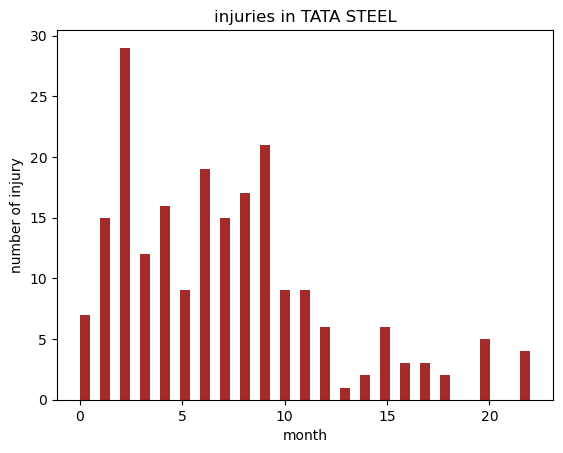

In [4]:
df = pd.read_csv('tata-steel.csv') 
  
# creating a histogram 
plt.hist(df['number of injury'], bins=45, color='brown') 
#plt.bar(df['plant'], df['number of injury'], width=20)
plt.xlabel('month')
plt.ylabel('number of injury')
plt.title('injuries in TATA STEEL')
plt.show()

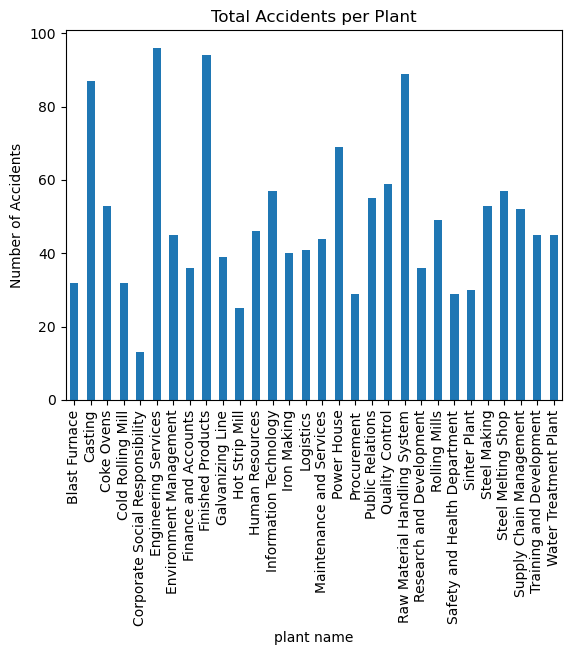

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Bar plot of total accidents per plant
plant_accidents = df.groupby('plant name')['number of injury'].sum()
plant_accidents.plot(kind='bar', title='Total Accidents per Plant', ylabel='Number of Accidents')
plt.show()

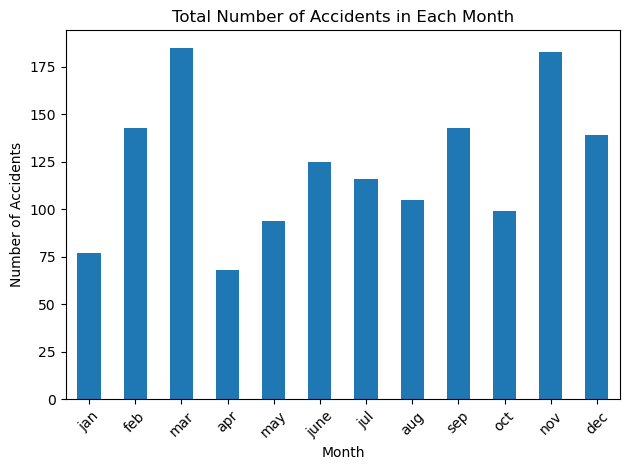

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Group by month and sum the number of accidents
monthly_accidents = df.groupby('month')['number of injury'].sum().reindex([
    'jan', 'feb', 'mar', 'apr', 'may', 'june', 
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

# Plotting the results
monthly_accidents.plot(kind='bar', title='Total Number of Accidents in Each Month', ylabel='Number of Accidents', xlabel='Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

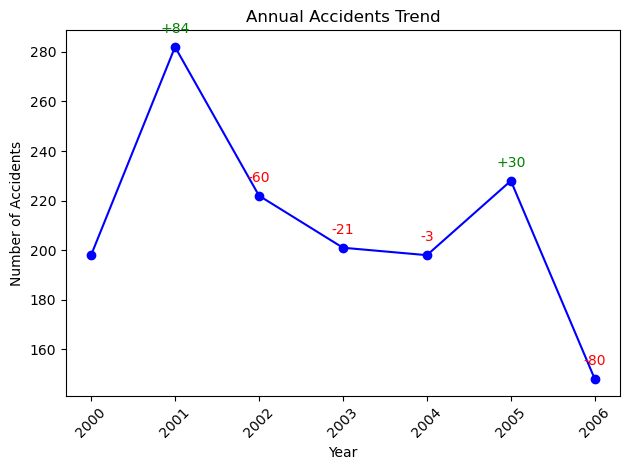

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Define the order of years
year_order = [2000, 2001, 2002, 2003, 2004, 2005, 2006]

# Group by year and sum the number of injuries
yearly_accidents = df.groupby('year')['number of injury'].sum().reindex(year_order)

# Plotting the results
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o', linestyle='-', color='b')
plt.title('Annual Accidents Trend')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding annotations to indicate increase or decrease
for i in range(1, len(yearly_accidents)):
    previous_value = yearly_accidents.iloc[i-1]
    current_value = yearly_accidents.iloc[i]
    change = current_value - previous_value
    plt.annotate(
        f'{change:+}', 
        (yearly_accidents.index[i], current_value),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        color='green' if change >= 0 else 'red'
    )

plt.show()

<Figure size 1200x600 with 0 Axes>

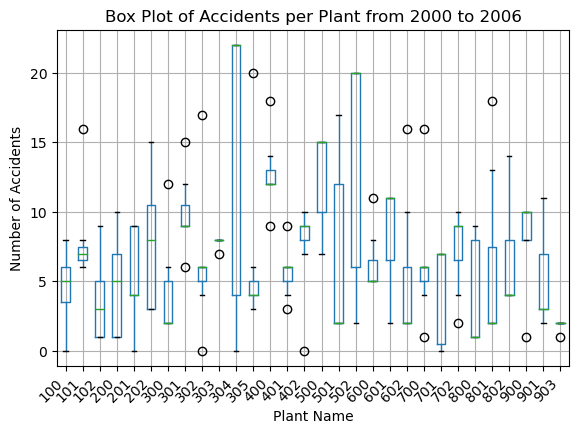

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Create a larger figure to space out the box plots
plt.figure(figsize=(12, 6))

# Box plot of number of accidents per plant
boxplot = df.boxplot(column='number of injury', by='plant')

# Adjust title and labels
plt.title('Box Plot of Accidents per Plant from 2000 to 2006')
plt.suptitle('')
plt.xlabel('Plant Name')
plt.ylabel('Number of Accidents')

# Set x-tick labels with some spacing
plt.xticks(rotation=45, ha='right')

# Add some space between the box plots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

plt.show()

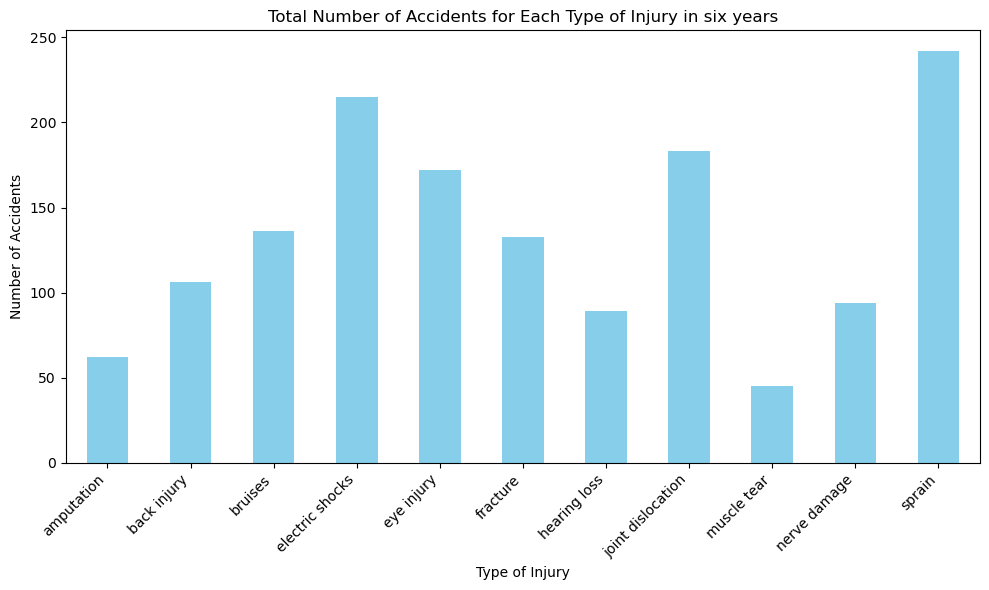

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Group by type of injury and sum the number of accidents
injury_accidents = df.groupby('type of injury')['number of injury'].sum()

# Plotting the results
plt.figure(figsize=(10, 6))
injury_accidents.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Total Number of Accidents for Each Type of Injury in six years')
plt.xlabel('Type of Injury')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

In [11]:
import pandas as pd

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Group by type of injury and sum the number of accidents
injury_accidents = df.groupby('type of injury')['number of injury'].sum()

# Find the maximum and minimum number of accidents by type of injury
max_injury = injury_accidents.idxmax()
max_accidents = injury_accidents.max()

min_injury = injury_accidents.idxmin()
min_accidents = injury_accidents.min()
print(f"The type of injury with the maximum number of accidents is '{max_injury}' with {max_accidents} accidents.")
print(f"The type of injury with the minimum number of accidents is '{min_injury}' with {min_accidents} accidents.")

The type of injury with the maximum number of accidents is 'sprain' with 242 accidents.
The type of injury with the minimum number of accidents is 'muscle tear' with 45 accidents.


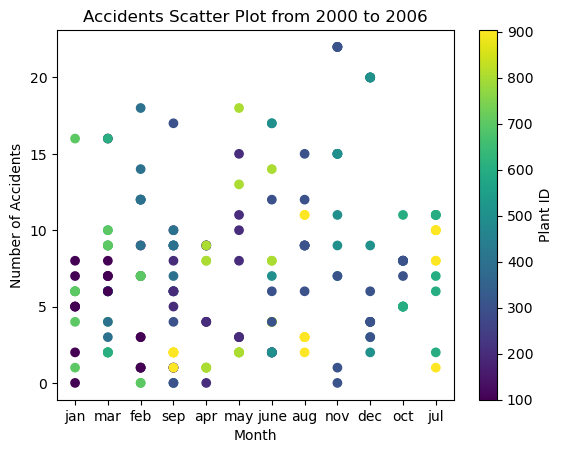

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Scatter plot of accidents by month and plant id
plt.scatter(df['month'], df['number of injury'], c=df['plant'], cmap='viridis')
plt.colorbar(label='Plant ID')
plt.title('Accidents Scatter Plot from 2000 to 2006')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

In [13]:
#generate a python code to predict the top 3 plants with the maximum number of accidents in upcoming years
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Group by plant and year and sum the number of injuries
plant_yearly_accidents = df.groupby(['plant name', 'year'])['number of injury'].sum().reset_index()

# List of unique plants
plants = plant_yearly_accidents['plant name'].unique()

# Dictionary to store predictions
predictions = {}

# Predict the number of accidents for each plant
for plant in plants:
    plant_data = plant_yearly_accidents[plant_yearly_accidents['plant name'] == plant]
    X = np.array(plant_data['year']).reshape(-1, 1)
    y = plant_data['number of injury'].values

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the number of accidents for the next year (assuming the last year in the data is 2006)
    next_year = np.array([[2007]])
    predicted_accidents = model.predict(next_year)
    
    predictions[plant] = predicted_accidents[0]

# Sort plants by predicted accidents in descending order and get the top 3
top_3_plants = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 plants with the predicted number of accidents
for plant, predicted_accidents in top_3_plants:
    print(f"Predicted number of accidents in 2007 for {plant}: {predicted_accidents:.2f}")

Predicted number of accidents in 2007 for Raw Material Handling System: 10.29
Predicted number of accidents in 2007 for Human Resources: 10.00
Predicted number of accidents in 2007 for Casting: 9.57


In [14]:
#generate a python code to predict the type of injury given the plant name, year and month
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['plant name', 'month', 'type of injury']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target
features = ['plant name', 'year', 'month']
target = 'type of injury'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoders['type of injury'].classes_))

# Function to predict the type of injury
def predict_injury(plant_name, year, month):
    plant_name_encoded = label_encoders['plant name'].transform([plant_name])[0]
    month_encoded = label_encoders['month'].transform([month])[0]
    input_data = [[plant_name_encoded, year, month_encoded]]
    predicted_injury_encoded = model.predict(input_data)[0]
    predicted_injury = label_encoders['type of injury'].inverse_transform([predicted_injury_encoded])[0]
    return predicted_injury

# Example usage
plant_name = 'Hot Strip Mill'
year = 2007
month = 'jan'
predicted_injury = predict_injury(plant_name, year, month)
print(f"Predicted type of injury for {plant_name} in {year}, {month}: {predicted_injury}")

                   precision    recall  f1-score   support

       amputation       1.00      0.50      0.67         2
      back injury       1.00      0.25      0.40         4
          bruises       0.00      0.00      0.00         0
  electric shocks       0.71      0.83      0.77         6
       eye injury       1.00      0.60      0.75         5
         fracture       0.75      0.75      0.75         4
     hearing loss       0.00      0.00      0.00         4
joint dislocation       0.29      0.25      0.27         8
      muscle tear       0.75      1.00      0.86         3
     nerve damage       0.67      0.50      0.57         4
           sprain       0.50      1.00      0.67         2

         accuracy                           0.52        42
        macro avg       0.61      0.52      0.52        42
     weighted avg       0.63      0.52      0.54        42

Predicted type of injury for Hot Strip Mill in 2007, jan: muscle tear


WITHOUT STREAMLIT

In [33]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Streamlit app
st.title('TATA STEEL Injury Analysis')

# Display the dataset
st.write("### Dataset")
st.write(df)

# Create a histogram
st.write("### Histogram of Injuries")
fig, ax = plt.subplots()
ax.hist(df['number of injury'], bins=45, color='brown')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Injuries')
ax.set_title('Injuries in TATA STEEL')
st.pyplot(fig)


DeltaGenerator()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Streamlit app
st.title('TATA STEEL Injury Analysis')


# Bar plot of total accidents per plant
st.write("### Total Accidents per Plant")
plant_accidents = df.groupby('plant name')['number of injury'].sum()

fig, ax = plt.subplots()
plant_accidents.plot(kind='bar', ax=ax, title='Total Accidents per Plant', ylabel='Number of Accidents')
st.pyplot(fig)


DeltaGenerator()

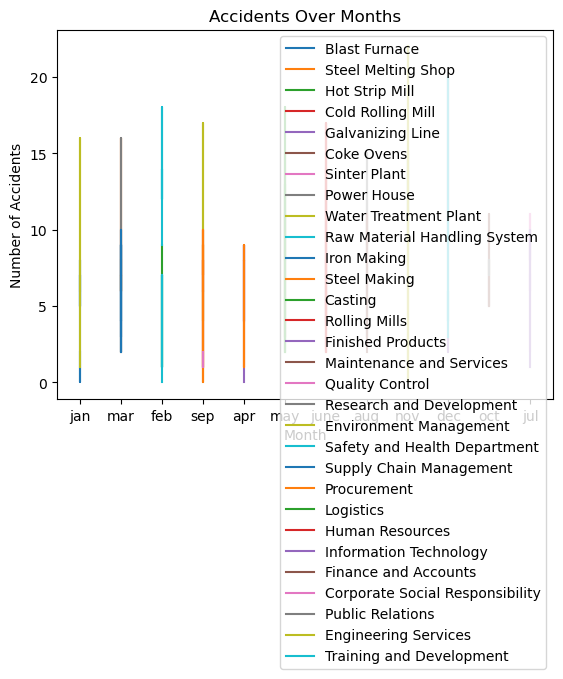

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Line plot of accidents over months for each plant
for plant in df['plant name'].unique():
    plant_data = df[df['plant name'] == plant]
    plt.plot(plant_data['month'], plant_data['number of injury'], label=plant)

plt.title('Accidents Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Streamlit app
st.title('TATA STEEL Injury Analysis')


# Group by month and sum the number of accidents
monthly_accidents = df.groupby('month')['number of injury'].sum().reindex([
    'jan', 'feb', 'mar', 'apr', 'may', 'june', 
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

# Plotting the results
st.write("### Total Number of Accidents in Each Month")
fig, ax = plt.subplots()
monthly_accidents.plot(kind='bar', ax=ax, title='Total Number of Accidents in Each Month', ylabel='Number of Accidents', xlabel='Month')
plt.xticks(rotation=45)
plt.tight_layout()
st.pyplot(fig)



DeltaGenerator()

thus we can see that maximum number of accidents took place in the month of November,
And minimum number of accidents took place in the month of April and May.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Streamlit app
st.title('TATA STEEL Annual Accident Analysis')

# Display the dataset
st.write("### Dataset")
st.write(df)

# Define the order of years
year_order = [2000, 2001, 2002, 2003, 2004, 2005, 2006]

# Group by year and sum the number of injuries
yearly_accidents = df.groupby('year')['number of injury'].sum().reindex(year_order)

# Plotting the results
st.write("### Annual Accidents Trend")
fig, ax = plt.subplots()
ax.plot(yearly_accidents.index, yearly_accidents.values, marker='o', linestyle='-', color='b')
ax.set_title('Annual Accidents Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding annotations to indicate increase or decrease
for i in range(1, len(yearly_accidents)):
    previous_value = yearly_accidents.iloc[i-1]
    current_value = yearly_accidents.iloc[i]
    change = current_value - previous_value
    ax.annotate(
        f'{change:+}', 
        (yearly_accidents.index[i], current_value),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        color='green' if change >= 0 else 'red'
    )

# Display the plot in Streamlit
st.pyplot(fig)


DeltaGenerator()

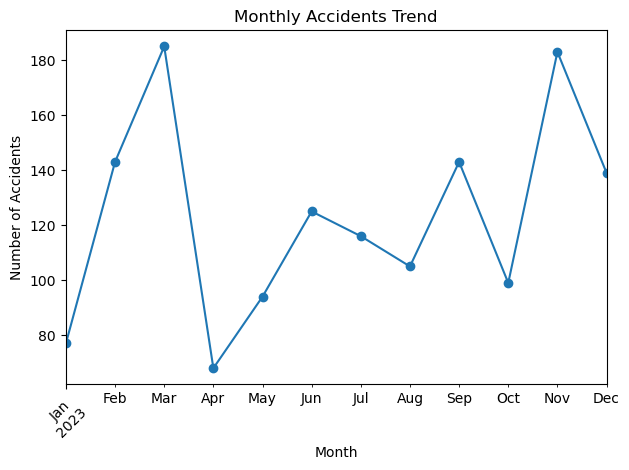

Predicted number of accidents for the next month: 121.55921608621496


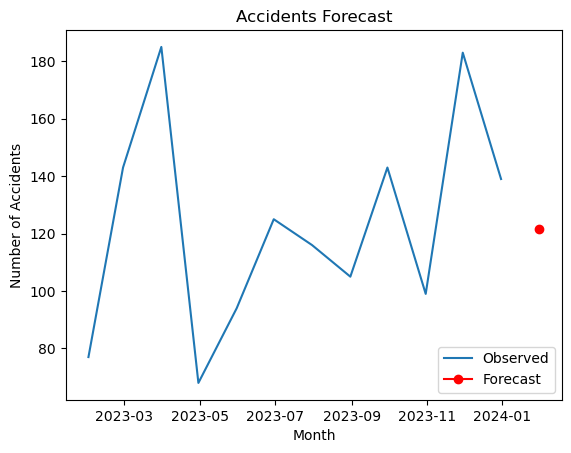

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Define the order of months
months_order = [
     'jan', 'feb', 'mar', 'apr', 'may', 'june', 
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]


# Convert month to categorical type with the correct order
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# Group by month and sum the number of accidents
monthly_accidents = df.groupby('month')['number of injury'].sum().reindex(months_order)
# Convert to a time series
monthly_accidents.index = pd.date_range(start='2023-01-01', periods=12, freq='M')

# Plotting the results
monthly_accidents.plot(title='Monthly Accidents Trend', ylabel='Number of Accidents', xlabel='Month', marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fit ARIMA model
model = ARIMA(monthly_accidents, order=(1, 1, 1))
model_fit = model.fit()

# Predict the next month
forecast = model_fit.forecast(steps=1)
print(f"Predicted number of accidents for the next month: {forecast[0]}")

# Plot the forecast
plt.plot(monthly_accidents, label='Observed')
plt.plot(monthly_accidents.index[-1] + pd.DateOffset(months=1), forecast, marker='o', color='red', label='Forecast')
plt.title('Accidents Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Define the order of years
year_order = [2000, 2001, 2002, 2003, 2004, 2005, 2006]

# Group by year and sum the number of injuries
yearly_accidents = df.groupby('year')['number of injury'].sum().reindex(year_order)

# Convert the index (years) and values (number of injuries) to numpy arrays for regression
X = np.array(yearly_accidents.index).reshape(-1, 1)  # Years as the feature
y = yearly_accidents.values  # Number of injuries as the target

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the number of accidents for the next year
next_year = np.array([[2007]])
predicted_accidents = model.predict(next_year)

print(f"Predicted number of accidents in 2007: {predicted_accidents[0]}")

# Plotting the results
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(next_year, predicted_accidents, marker='x', color='r', label='Prediction')
plt.title('Annual Accidents Trend')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Adding annotations to indicate increase or decrease
for i in range(1, len(yearly_accidents)):
    previous_value = yearly_accidents.iloc[i-1]
    current_value = yearly_accidents.iloc[i]
 


Predicted number of accidents in 2007: 170.71428571428623


In [42]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

def load_data():
    # Load data from a CSV file
    df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')
    return df

def plot_accidents(df):
    # Create a larger figure to space out the box plots
    plt.figure(figsize=(12, 6))

    # Box plot of number of accidents per plant
    boxplot = df.boxplot(column='number of injury', by='plant')

    # Adjust title and labels
    plt.title('Box Plot of Accidents per Plant from 2000 to 2006')
    plt.suptitle('')
    plt.xlabel('Plant Name')
    plt.ylabel('Number of Accidents')

    # Set x-tick labels with some spacing
    plt.xticks(rotation=45, ha='right')

    # Add some space between the box plots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

    # Show plot in Streamlit
    st.pyplot(plt)

def main():
    # Title of the app
    st.title("Accident Analysis Dashboard")

    # Load the data
    df = load_data()

    # Subheader in the app
    st.subheader("Box Plot of Accidents per Plant")

    # Display the plot
    plot_accidents(df)

if __name__ == "__main__":
    main()


In [43]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

def load_data():
    # Load data from a CSV file
    df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')
    return df

def plot_injury_data(df):
    # Group by type of injury and sum the number of accidents
    injury_accidents = df.groupby('type of injury')['number of injury'].sum()

    # Plotting the results
    plt.figure(figsize=(10, 6))
    injury_accidents.plot(kind='bar', color='skyblue')

    # Add title and labels
    plt.title('Total Number of Accidents for Each Type of Injury in six years')
    plt.xlabel('Type of Injury')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show plot in Streamlit
    st.pyplot(plt)

def main():
    st.title("Accident Analysis Dashboard")

    # Load data
    df = load_data()

    # Display the bar plot
    st.subheader("Number of Accidents for Each Type of Injury")
    plot_injury_data(df)

if __name__ == "__main__":
    main()



In [44]:
import streamlit as st
import pandas as pd

def load_data():
    # Load data from a CSV file
    return pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

def analyze_data(df):
    # Group by type of injury and sum the number of accidents
    injury_accidents = df.groupby('type of injury')['number of injury'].sum()

    # Find the maximum and minimum number of accidents by type of injury
    max_injury = injury_accidents.idxmax()
    max_accidents = injury_accidents.max()

    min_injury = injury_accidents.idxmin()
    min_accidents = injury_accidents.min()
    
    return max_injury, max_accidents, min_injury, min_accidents

def main():
    st.title("Accident Analysis Dashboard")

    # Load data
    df = load_data()

    max_injury, max_accidents, min_injury, min_accidents = analyze_data(df)

    # Display results
    st.subheader("Accident Statistics")
    st.write(f"The type of injury with the maximum number of accidents is **'{max_injury}'** with **{max_accidents}** accidents.")
    st.write(f"The type of injury with the minimum number of accidents is **'{min_injury}'** with **{min_accidents}** accidents.")

if __name__ == "__main__":
    main()


In [55]:
#predicts the type of injury given the plant name, month and the number of injuries.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import streamlit as st
# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Encode categorical variables
le_plant_name = LabelEncoder()
le_month = LabelEncoder()
le_year = LabelEncoder() 
le_injury = LabelEncoder()

df['plant name'] = le_plant_name.fit_transform(df['plant name'])
df['month'] = le_month.fit_transform(df['month'])
df['year'] = le_year.fit_transform(df['year'])
df['type of injury'] = le_injury.fit_transform(df['type of injury'])

# Features and target variable
X = df[['plant name', 'month', 'year', 'number of injury']]
y = df['type of injury']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the type of injury for a given plant
def predict_injury(plant_name, month, year, number_of_accidents):
    try:
        plant_encoded = le_plant_name.transform([plant_name])[0]
        month_encoded = le_month.transform([month])[0]
    except ValueError as e:
        return str(e)
    
    prediction = clf.predict([[plant_encoded, month_encoded, year, number_of_accidents]])
    injury_type = le_injury.inverse_transform(prediction)
    return injury_type[0]

# Example prediction
plant_name = 'Hot Strip Mill'  # Ensure this plant name is present in your dataset
month = 'may'# Ensure this month is present in your dataset
year = 2005
number_of_accidents = 5
predicted_injury = predict_injury(plant_name, month, year, number_of_accidents)
st.write(f"The most probable type of injury at {plant_name} in {month} year {year} with {number_of_accidents} accidents is {predicted_injury}.")

In [47]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Streamlit interface
st.title("Accidents Scatter Plot")

# Scatter plot of accidents by month and plant id
fig, ax = plt.subplots()
scatter = ax.scatter(df['month'], df['number of injury'], c=df['plant'], cmap='viridis')
plt.colorbar(scatter, ax=ax, label='Plant ID')
plt.title('Accidents Scatter Plot from 2000 to 2006')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# Show plot
st.pyplot(fig)


DeltaGenerator()

In [48]:
#generate a python code to predict the top 3 plants with the maximum number of accidents in upcoming years
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')

# Group by plant and year and sum the number of injuries
plant_yearly_accidents = df.groupby(['plant name', 'year'])['number of injury'].sum().reset_index()

# Streamlit interface
st.title("Predict Top 3 Plants with Maximum Accidents in Upcoming Year")

# List of unique plants
plants = plant_yearly_accidents['plant name'].unique()

# Dictionary to store predictions
predictions = {}

# Predict the number of accidents for each plant
for plant in plants:
    plant_data = plant_yearly_accidents[plant_yearly_accidents['plant name'] == plant]
    X = np.array(plant_data['year']).reshape(-1, 1)
    y = plant_data['number of injury'].values

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the number of accidents for the next year (assuming the last year in the data is 2006)
    next_year = np.array([[2007]])
    predicted_accidents = model.predict(next_year)
    
    predictions[plant] = predicted_accidents[0]

# Sort plants by predicted accidents in descending order and get the top 3
top_3_plants = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:3]

# Display the top 3 plants with the predicted number of accidents
st.write("Top 3 Plants with Maximum Accidents in Upcoming Year:")
for plant, predicted_accidents in top_3_plants:
    st.write(f"- {plant}: {predicted_accidents:.2f}")


In [ ]:
#generate a python code to predict the year in the upcoming decade with maximum number of accidents

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

# Load data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\accident-prediction\tata-steel.csv')  # Using raw string to handle backslashes

# Group by year and sum the number of injuries
yearly_accidents = df.groupby('year')['number of injury'].sum().reset_index()

# Prepare the data for Prophet
yearly_accidents.columns = ['ds', 'y']  # Prophet requires the columns to be named 'ds' and 'y'
yearly_accidents['ds'] = pd.to_datetime(yearly_accidents['ds'], format='%Y')

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(yearly_accidents)

# Create a dataframe for future predictions (next 10 years after 2006)
future = model.make_future_dataframe(periods=10, freq='Y', include_history=False)
future['ds'] = pd.to_datetime([f'{year}-12-31' for year in range(2007, 2017)])

# Predict the future
forecast = model.predict(future)

# Extract the year with the maximum number of accidents
max_year = forecast.loc[forecast['yhat'].idxmax()]['ds'].year
max_accidents = forecast.loc[forecast['yhat'].idxmax()]['yhat']

# Streamlit app
st.title("Accident Prediction in Upcoming Decade")
st.write(f"The year with the maximum number of accidents in the upcoming decade is *{max_year}* with *{max_accidents:.2f}* predicted accidents.")

# Plotting the forecast
fig, ax = plt.subplots()
model.plot(forecast, ax=ax)
ax.set_title('Forecasted Number of Accidents')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')

st.pyplot(fig)